In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pylab
import re
import csv
from IPython.display import display, HTML  # To display correct tables
from pprint import pprint
plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (16.0, 8.0)
cp = sns.color_palette()

Using TensorFlow backend.


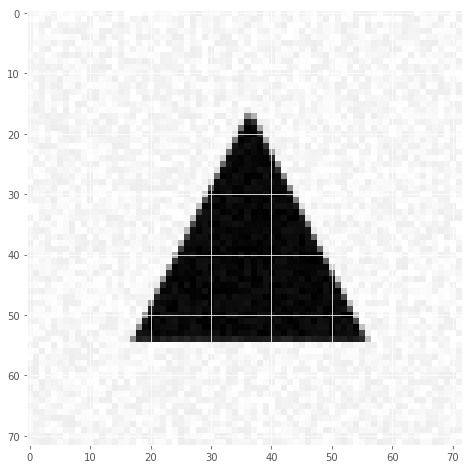

In [3]:
from mp1 import *

# 3. Simple Classification

We are going to tackle the classification problem over a set of 3000 samples. 2700 samples will be used for training and 300 for validation.

We will focus in this part on the convergence of the optimizers and will simply use one dense layer and one output layer for the network's architecture.

In [4]:
[X_train_0, Y_train_0] = generate_dataset_classification(3000, 20, False)
Y_train_cat_0 = np_utils.to_categorical(Y_train_0)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

model0_sgd = Sequential()
model0_sgd.add(Dense(3, activation="softmax"))

x_train, y_train = X_train_0[:2700], Y_train_cat_0[:2700]
x_test, y_test = X_train_0[2700:], Y_train_cat_0[2700:]

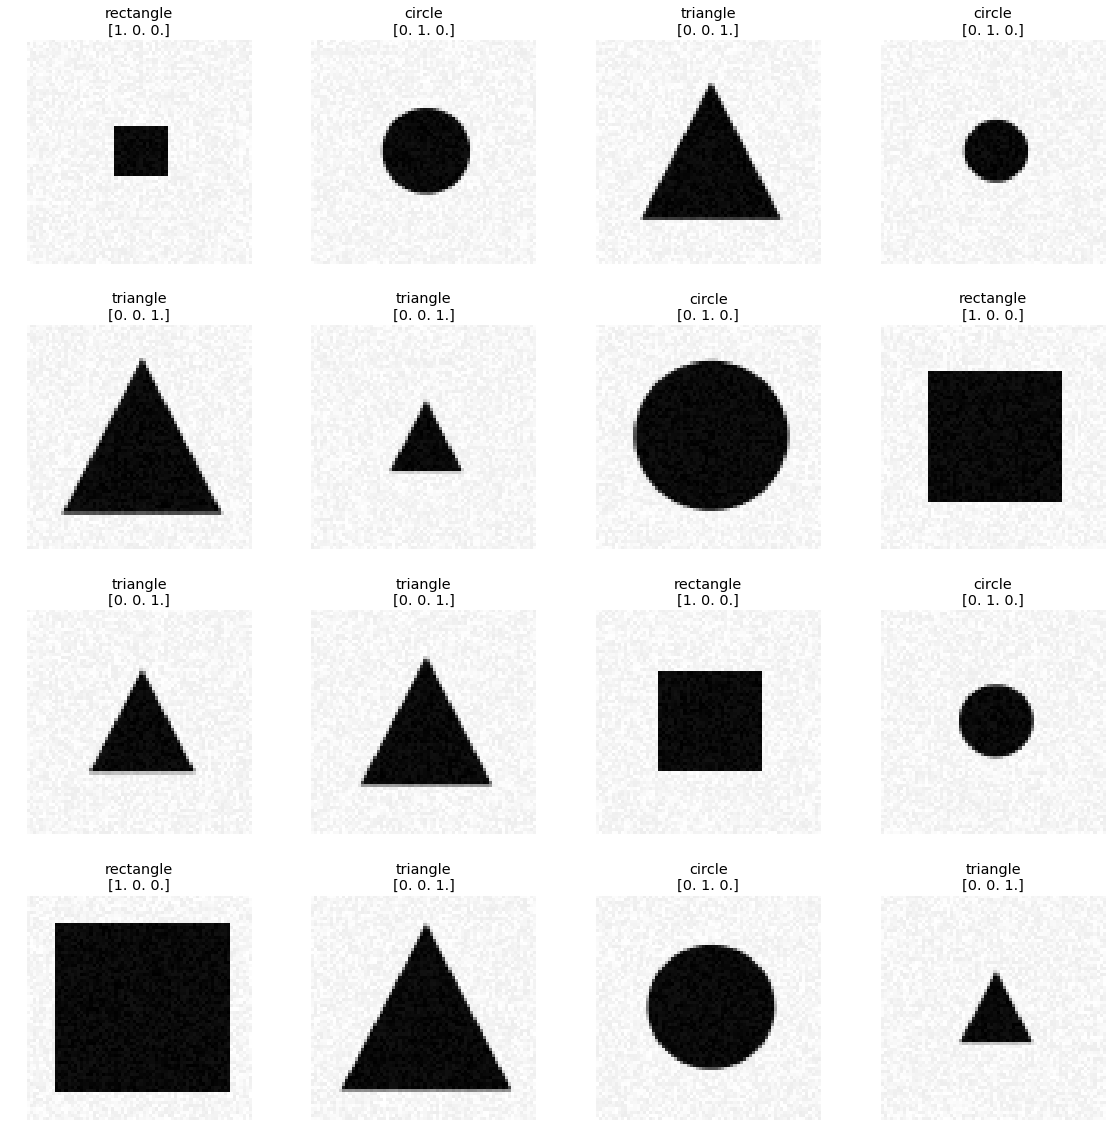

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

In [10]:
plt.figure(figsize=(16.0, 4 * 4.0))
for i in range(16):
    img = x_train[i].reshape((72, 72))
    lab = ""
    if Y_train_0[i] == 0:
        lab = "rectangle"
    elif Y_train_0[i] == 1:
        lab = "circle"
    else:
        lab = "triangle"
    lab += f"\n{y_train[i]}"
    plt.subplot(4, 4, i + 1)
    plt.title(lab)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray)
plt.tight_layout()
plt.show()
plt.figure(figsize=(16.0, 8.0))

In [11]:
def parse_pred(a):
    if np.all(a == [1, 0, 0]):
        return "rectangle"
    elif np.all(a == [0, 1, 0]):
        return "circle"
    else:
        return "triangle"

## Stochastic Gradient Descent

### Training

In [13]:
sgd = SGD(lr=0.001)

model0_sgd.compile(optimizer=sgd, loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])
fit0_sgd = model0_sgd.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=50)

scores0_sgd_train = model0_sgd.evaluate(x_train, y_train, verbose=1)
scores0_sgd_test = model0_sgd.evaluate(x_test, y_test, verbose=1)

print(f"Model 0 Train accuracy on train set: {scores0_sgd_train[1]:.2%}")
print(f"Model 0 Train accuracy on test set: {scores0_sgd_test[1]:.2%}")

Train on 2700 samples, validate on 300 samples
Epoch 1/20
2700/2700 [==============================] - 0s 80us/step - loss: 0.2783 - acc: 0.9670 - val_loss: 0.2794 - val_acc: 0.9567
Epoch 2/20
2700/2700 [==============================] - 0s 36us/step - loss: 0.2651 - acc: 0.9674 - val_loss: 0.2999 - val_acc: 0.9167
Epoch 3/20
2700/2700 [==============================] - 0s 44us/step - loss: 0.2546 - acc: 0.9681 - val_loss: 0.2533 - val_acc: 0.9633
Epoch 4/20
2700/2700 [==============================] - 0s 41us/step - loss: 0.2438 - acc: 0.9696 - val_loss: 0.2420 - val_acc: 0.9633
Epoch 5/20
2700/2700 [==============================] - 0s 37us/step - loss: 0.2300 - acc: 0.9741 - val_loss: 0.2395 - val_acc: 1.0000
Epoch 6/20
2700/2700 [==============================] - 0s 42us/step - loss: 0.2210 - acc: 0.9770 - val_loss: 0.2309 - val_acc: 0.9533
Epoch 7/20
2700/2700 [==============================] - 0s 38us/step - loss: 0.2140 - acc: 0.9737 - val_loss: 0.2134 - val_acc: 0.9633
Epoch 8/

We can see that even with a simple model, we can obtain good performance on this first dataset.

The learning rate was set after testing a few values from different ranges. With greater values, we tend to oscillate around the optimum and with a learning rate too little the convergence is slow.

### Visualization

In [14]:
test_sample = generate_a_disk()
test_sample = test_sample.reshape(1, -1)
print(parse_pred(model0_sgd.predict(test_sample)))
del test_sample

circle


[]

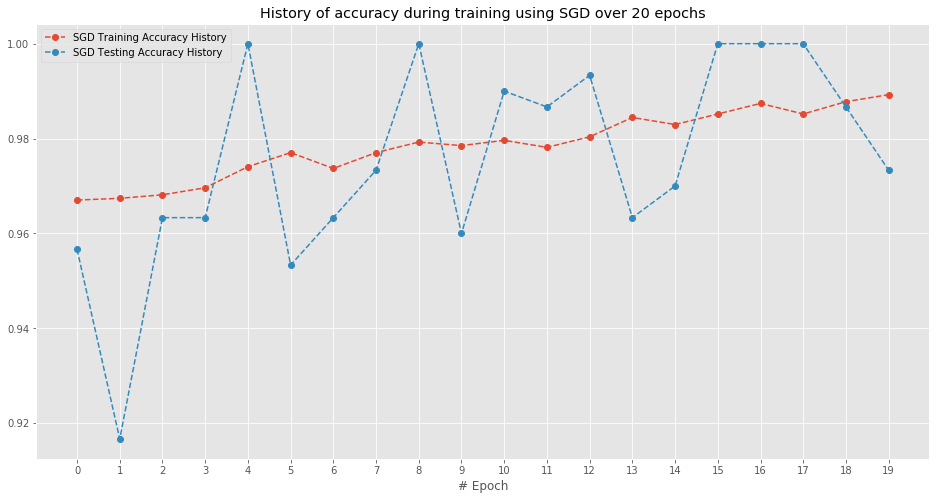

In [17]:
plt.plot(np.arange(0, 20), fit0_sgd.history["acc"], '--o', label="SGD Training Accuracy History")
plt.plot(np.arange(0, 20), fit0_sgd.history["val_acc"], '--o', label="SGD Testing Accuracy History")
plt.xticks(range(21))
plt.legend()
plt.title("History of accuracy during training using SGD over 20 epochs")
plt.xlabel("# Epoch")
plt.plot()

We can note that we have a higher variance in the accuracy over the test set as it is smaller.

## Adam

### Training

In [18]:
from keras.optimizers import Adam
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.95) 

model0_adam = Sequential()
model0_adam.add(Dense(3, activation="softmax"))

model0_adam.compile(optimizer=adam, loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])
fit0_adam = model0_adam.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15, batch_size=100)

scores0_adam_train = model0_adam.evaluate(x_train, y_train, verbose=1)
scores0_adam_test = model0_adam.evaluate(x_test, y_test, verbose=1)

print(f"Model 0 Train accuracy on train set: {scores0_adam_train[1]:.2%}")
print(f"Model 0 Train accuracy on test set: {scores0_adam_test[1]:.2%}")

Train on 2700 samples, validate on 300 samples
Epoch 1/15
2700/2700 [==============================] - 0s 99us/step - loss: 1.2203 - acc: 0.5581 - val_loss: 0.4809 - val_acc: 0.8267
Epoch 2/15
2700/2700 [==============================] - 0s 36us/step - loss: 0.3948 - acc: 0.8126 - val_loss: 0.2831 - val_acc: 0.8833
Epoch 3/15
2700/2700 [==============================] - 0s 39us/step - loss: 0.2389 - acc: 0.9115 - val_loss: 0.1657 - val_acc: 0.9867
Epoch 4/15
2700/2700 [==============================] - 0s 34us/step - loss: 0.1454 - acc: 0.9785 - val_loss: 0.1159 - val_acc: 1.0000
Epoch 5/15
2700/2700 [==============================] - 0s 40us/step - loss: 0.0907 - acc: 0.9952 - val_loss: 0.0736 - val_acc: 1.0000
Epoch 6/15
2700/2700 [==============================] - 0s 37us/step - loss: 0.0593 - acc: 0.9974 - val_loss: 0.0483 - val_acc: 1.0000
Epoch 7/15
2700/2700 [==============================] - 0s 34us/step - loss: 0.0426 - acc: 0.9985 - val_loss: 0.0302 - val_acc: 1.0000
Epoch 8/

It seems that we have a faster convergence to a more satisfying optimum using the Adam algorithm. We actually manage to perform 100% accuracy on this dataset.

### Visualization

In [19]:
test_sample = generate_a_disk()
test_sample = test_sample.reshape(1, -1)
print(parse_pred(model0_adam.predict(test_sample)))
del test_sample

circle


[]

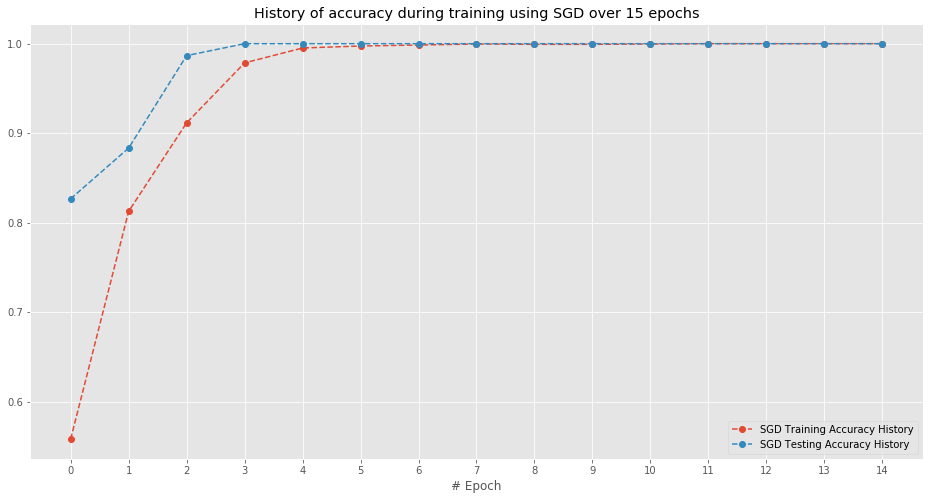

In [20]:
plt.plot(np.arange(0, 15), fit0_adam.history["acc"], '--o', label="SGD Training Accuracy History")
plt.plot(np.arange(0, 15), fit0_adam.history["val_acc"], '--o', label="SGD Testing Accuracy History")
plt.xticks(range(15))
plt.legend()
plt.title("History of accuracy during training using SGD over 15 epochs")
plt.xlabel("# Epoch")
plt.plot()

# 4. Visualization of the Solution

In [26]:
model0_sgd.get_weights()[0][:, 0]

array([-0.02073163, -0.0109262 ,  0.01126228, ...,  0.0250828 ,
       -0.02816297,  0.01670906], dtype=float32)

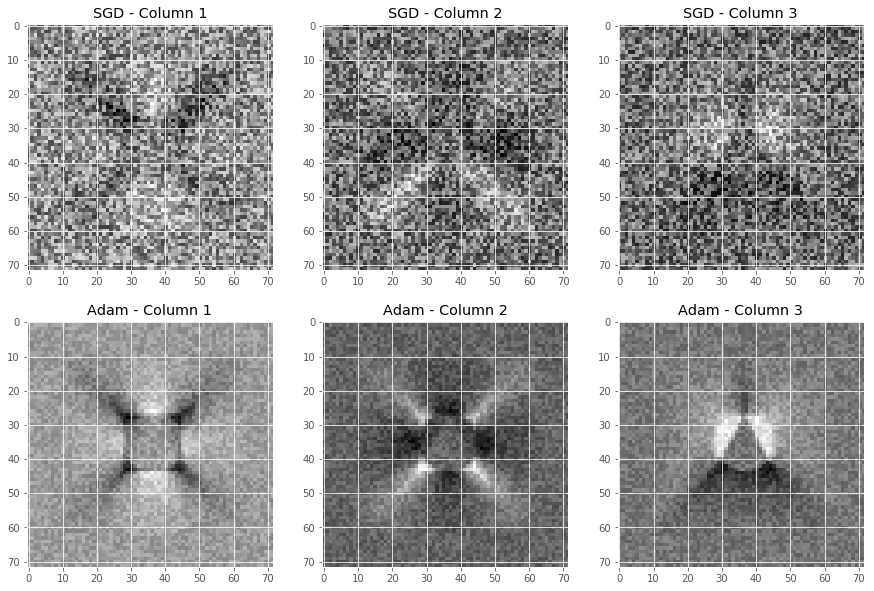

In [29]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title("SGD - Column 1")
plt.imshow(model0_sgd.get_weights()[0][:, 0].reshape(72, 72), cmap=plt.cm.gray)
plt.subplot(2, 3, 2)
plt.title("SGD - Column 2")
plt.imshow(model0_sgd.get_weights()[0][:, 1].reshape(72, 72), cmap=plt.cm.gray)
plt.subplot(2, 3, 3)
plt.title("SGD - Column 3")
plt.imshow(model0_sgd.get_weights()[0][:, 2].reshape(72, 72), cmap=plt.cm.gray)

plt.subplot(2, 3, 4)
plt.title("Adam - Column 1")
plt.imshow(model0_adam.get_weights()[0][:, 0].reshape(72, 72), cmap=plt.cm.gray)
plt.subplot(2, 3, 5)
plt.title("Adam - Column 2")
plt.imshow(model0_adam.get_weights()[0][:, 1].reshape(72, 72), cmap=plt.cm.gray)
plt.subplot(2, 3, 6)
plt.title("Adam - Column 3")
plt.imshow(model0_adam.get_weights()[0][:, 2].reshape(72, 72), cmap=plt.cm.gray)

plt.show()
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

In the adam weights we can clearly see appearing the shapes we are trying to classify. The SGD weights seem like a much noisier version of the adam weights.

# 5. A More Difficult Classification Problem

In [18]:
[X_train, Y_train] = generate_dataset_classification(10000, 20, True)
Y_train_cat = np_utils.to_categorical(Y_train)
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

In [5]:
import pickle
# pickle.dump((X_train, Y_train, Y_train_cat), open("train_data.pkl", 'wb'))
X_train, Y_train, Y_train_cat = pickle.load(open("train_data.pkl", "rb"))
[X_test, Y_test] = generate_test_set_classification()  # Has a fixed seed

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [29]:
import keras
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dropout, Dense

model_class = Sequential()
activation = "relu"

model_class.add(Conv2D(filters=6, kernel_size=5, input_shape=(72, 72, 1), activation="relu"))
model_class.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_class.add(Conv2D(filters=16, kernel_size=5, activation="relu"))
model_class.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_class.add(Flatten())
model_class.add(Dense(36, activation="relu"))
model_class.add(Dropout(0.5))
model_class.add(Dense(24, activation="relu"))
model_class.add(Dropout(0.5))
model_class.add(Dense(3, activation="softmax"))

# adam = Adam(lr=0.04, beta_1=0.9, beta_2=0.99)
sgd = SGD(lr=0.1)
model_class.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
model_class.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 68, 68, 6)         156       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 34, 34, 6)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 30, 30, 16)        2416      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 3600)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 36)                129636    
_________________________________________________________________
dropout_21 (Dropout)         (None, 36)                0         
__________

In [30]:
fit_class_adam = model_class.fit(
    X_train.reshape(10000, 72, 72, 1), Y_train_cat,
    validation_data=(X_test.reshape(300, 72, 72, 1), Y_test),
    batch_size=150, epochs=50
)

scores_train = model_class.evaluate(X_train.reshape(10000, 72, 72, 1), Y_train_cat, verbose=1)
scores_test = model_class.evaluate(X_test.reshape(300, 72, 72, 1), Y_test, verbose=1)

print(f"Model accuracy on train set: {scores_train[1]:.2%}")
print(f"Model accuracy on test set: {scores_test[1]:.2%}")

Train on 10000 samples, validate on 300 samples
Epoch 1/50
10000/10000 [==============================] - 15s 2ms/step - loss: 1.0711 - acc: 0.4181 - val_loss: 0.9749 - val_acc: 0.5733
Epoch 2/50
10000/10000 [==============================] - 16s 2ms/step - loss: 0.9340 - acc: 0.5412 - val_loss: 0.7447 - val_acc: 0.6333
Epoch 3/50
10000/10000 [==============================] - 19s 2ms/step - loss: 0.8109 - acc: 0.6177 - val_loss: 0.6656 - val_acc: 0.6933
Epoch 4/50
10000/10000 [==============================] - 15s 2ms/step - loss: 0.7408 - acc: 0.6612 - val_loss: 0.6058 - val_acc: 0.7233
Epoch 5/50
10000/10000 [==============================] - 16s 2ms/step - loss: 0.6336 - acc: 0.7306 - val_loss: 0.4388 - val_acc: 0.8467
Epoch 6/50
10000/10000 [==============================] - 16s 2ms/step - loss: 0.5030 - acc: 0.8081 - val_loss: 0.3513 - val_acc: 0.8500
Epoch 7/50
10000/10000 [==============================] - 15s 1ms/step - loss: 0.4053 - acc: 0.8529 - val_loss: 0.2518 - val_acc: 

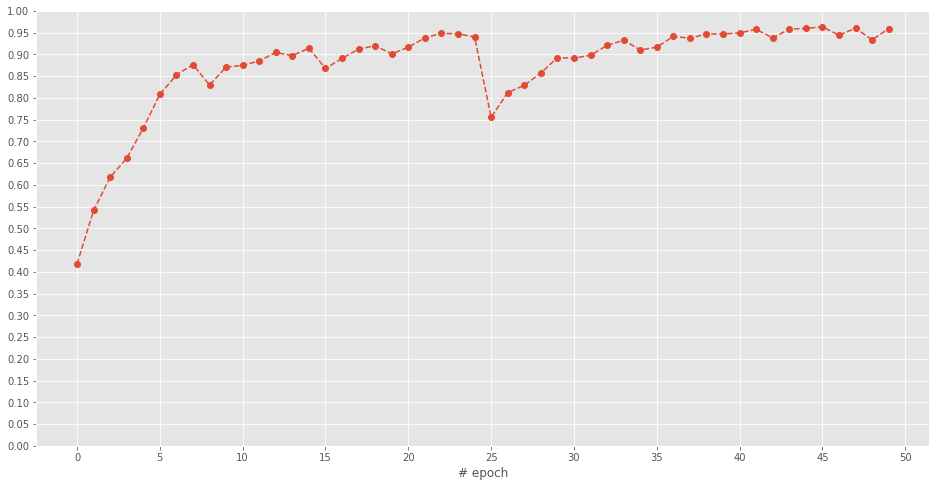

In [32]:
plt.plot(range(50), fit_class_adam.history["acc"], "--o", label="Accuracy history")
plt.xlabel("# epoch")
plt.xticks(np.arange(0, 51, 5))
plt.yticks(np.arange(0, 1.01, 0.05))
plt.show()

We end up with a pretty good accuracy of 97%. We may gain a little more by introducing learning rate decay or manually reducing the learning rate when reaching 95% as we seem to oscillate around the optimal solution.

# 6. A regression problem

In [7]:
[X_train, Y_train] = generate_dataset_regression(5000, 20)
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

In [5]:
import pickle
# pickle.dump((X_train, Y_train), open("train_data_regression.pkl", 'wb'))
X_train, Y_train = pickle.load(open("train_data_regression.pkl", "rb"))
[X_test, Y_test] = generate_test_set_regression()  # Has a fixed seed

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


[0.86715088 0.43508018 0.87709652 0.51449492 0.31805309 0.0818707 ]


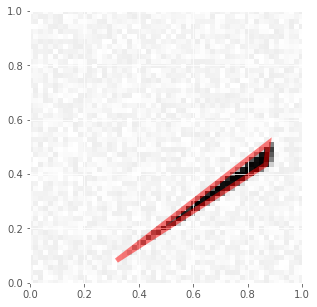

[0.22851079 0.51430636 0.3701454  0.55274939 0.37099797 0.73491765]


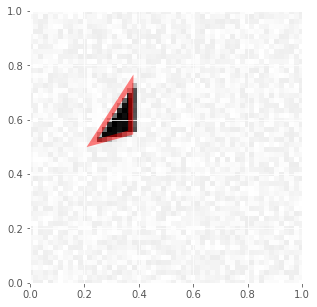

[0.38551656 0.53314496 0.78542839 0.47329339 0.61562337 0.54600873]


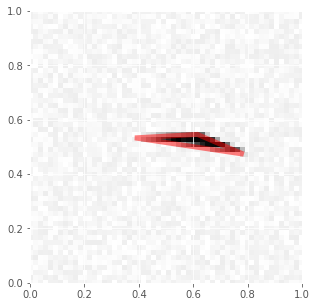

[0.09672239 0.64375002 0.26275607 0.23792173 0.38957148 0.5203255 ]


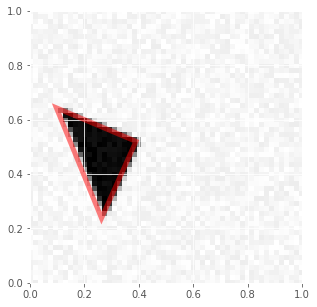

[0.41640229 0.13796738 0.34737324 0.65714628 0.77125834 0.16148371]


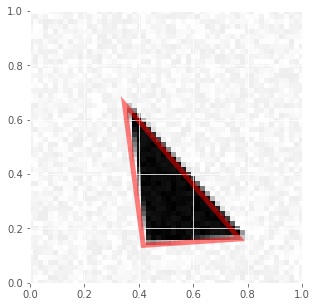

In [25]:
for i in range(5):
    print(Y_train[i])
    visualize_prediction(X_train[i], Y_train[i])
    plt.show()

The first major issue we face with this problem is that without further restrictions, each sample can be mapped with 6 different valid outputs (depending on the order of the points returned). The same solution with the vertices returned in different orders will lead to a high loss, which should not happen. We will try to solve this problem by ordering the vertices based on their x coordinate, hoping the network will capture this constraint.

In [44]:
Y_train_preproc = Y_train.copy()
for i in range(Y_train.shape[0]):
    y = Y_train[i].reshape(3, 2)
    Y_train_preproc[i] = np.array(sorted([y[i, :] for i in range(y.shape[0])], key=lambda l: l[0])).flatten()
    
Y_test_preproc = Y_test.copy()
for i in range(Y_test.shape[0]):
    y = Y_test[i].reshape(3, 2)
    Y_test_preproc[i] = np.array(sorted([y[i, :] for i in range(y.shape[0])], key=lambda l: l[0])).flatten()

In [68]:
import keras
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dropout, Dense

model_reg = Sequential()
activation = "relu"

model_reg.add(Conv2D(filters=6, kernel_size=5, input_shape=(72, 72, 1), activation="relu"))
model_reg.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_reg.add(Conv2D(filters=16, kernel_size=5, activation="relu"))
model_reg.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_reg.add(Flatten())
model_reg.add(Dense(36, activation="relu"))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(24, activation="relu"))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(6, activation="linear"))

sgd = SGD(lr=0.01)
model_reg.compile(loss="mean_squared_error", optimizer=sgd)
model_reg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 68, 68, 6)         156       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 34, 34, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 16)        2416      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 36)                129636    
_________________________________________________________________
dropout_7 (Dropout)          (None, 36)                0         
__________

In [69]:
fit_reg = model_reg.fit(
    X_train.reshape(5000, 72, 72, 1), Y_train_preproc,
    validation_data=(X_test.reshape(300, 72, 72, 1), Y_test_preproc),
    batch_size=30, epochs=20
)

scores_train = model_reg.evaluate(X_train.reshape(5000, 72, 72, 1), Y_train_preproc, verbose=1)
scores_test = model_reg.evaluate(X_test.reshape(300, 72, 72, 1), Y_test_preproc, verbose=1)

print(f"Model accuracy on train set: {scores_train:.2%}")
print(f"Model accuracy on test set: {scores_test:.2%}")

Train on 5000 samples, validate on 300 samples
Epoch 1/20
5000/5000 [==============================] - 8s 2ms/step - loss: 0.1612 - val_loss: 0.0919
Epoch 2/20
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0998 - val_loss: 0.0743
Epoch 3/20
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0830 - val_loss: 0.0668
Epoch 4/20
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0760 - val_loss: 0.0646
Epoch 5/20
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0719 - val_loss: 0.0628
Epoch 6/20
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0700 - val_loss: 0.0618
Epoch 7/20
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0682 - val_loss: 0.0610
Epoch 8/20
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0663 - val_loss: 0.0605
Epoch 9/20
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0647 - val_loss: 0.0594
Epoch 10/20
5000/5000 [============

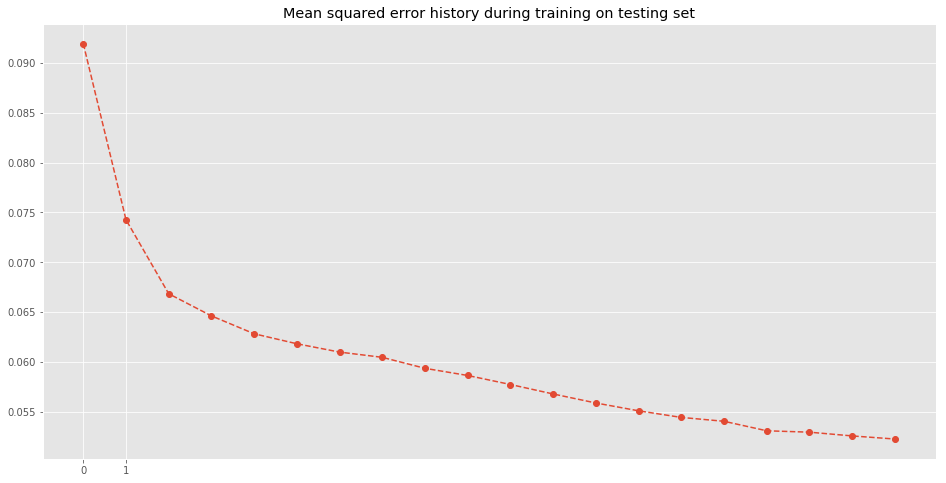

In [72]:
plt.plot(fit_reg.history["val_loss"], "--o")
plt.xticks(range(len(fit_reg.history)))
plt.title("Mean squared error history during training on testing set")
plt.show()

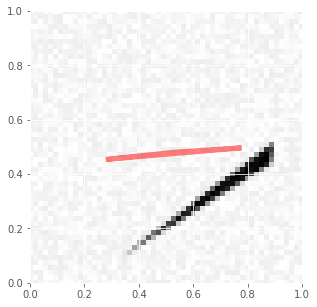

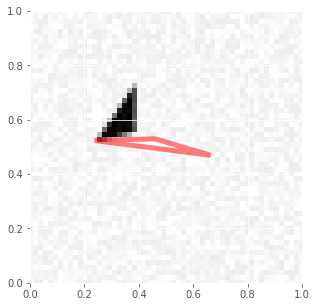

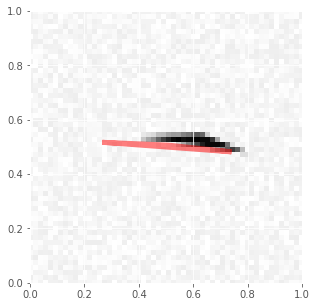

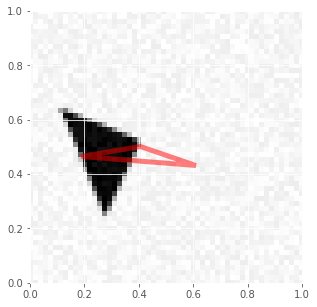

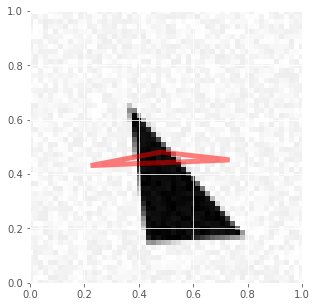

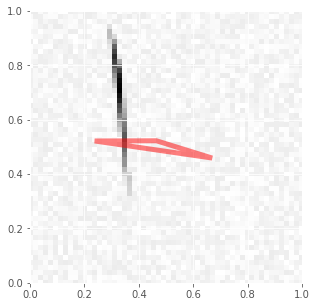

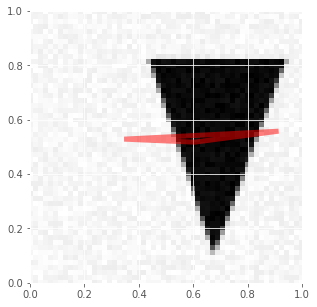

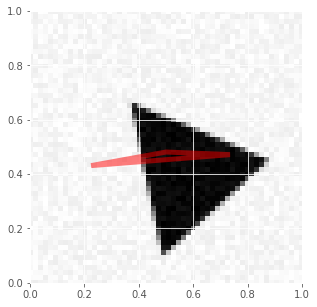

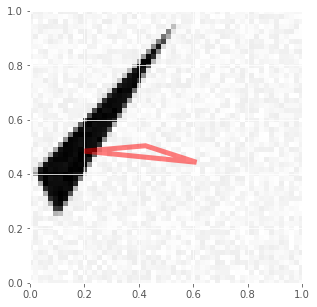

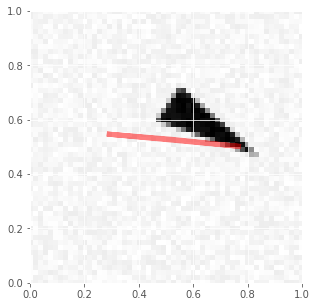

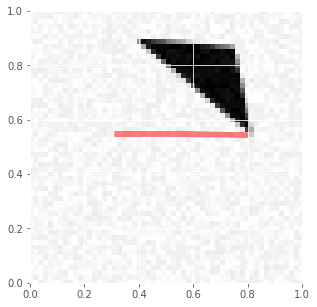

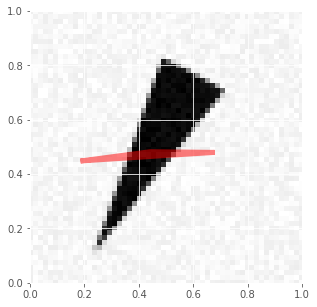

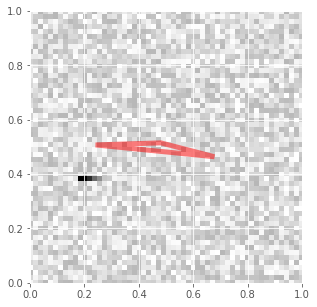

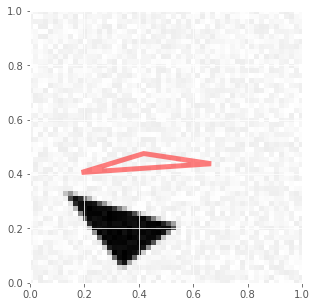

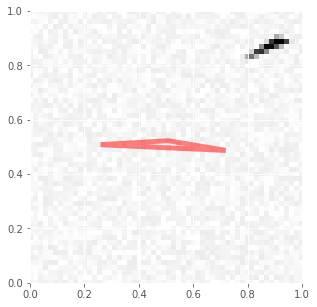

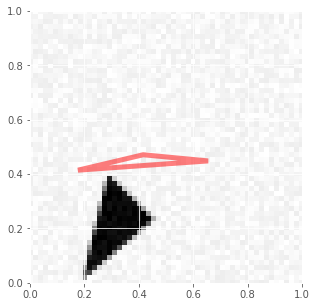

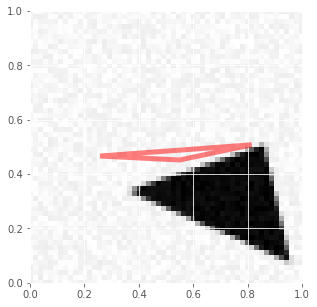

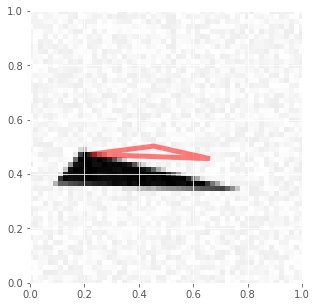

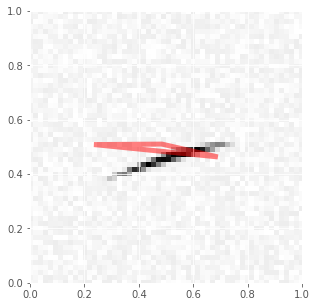

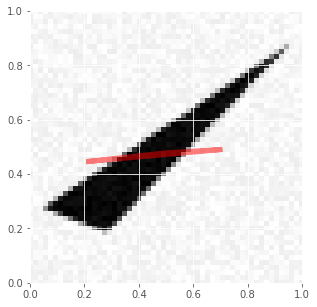

In [73]:
for i in range(20):
    visualize_prediction(X_train[i], model_reg.predict(X_train[i].reshape(1, 72, 72, 1)))

The results are not satisfying at all. Our network at best tends to return points in the area of the triangle but doesn't appear to be fitting the vertices at all. Some ideas to get better results could be to perform segmentation, which should perform really well on such a dataset, and extract a triangle from the segmentation result or perform deformation to match our triangle to a standard triangle and extract the vertices by applying the inverse deformation to the standard vertices.

We will now try the same network but with separate dense layers for each vertice, hoping it will help capturing the vertice's position and not just the approximate triangle's position.

In [90]:
from keras.models import Model
import keras.layers as kl

inp = kl.Input(shape=(72, 72, 1))
conv_1 = kl.Conv2D(filters=6, kernel_size=3, activation="relu")(inp)
max_pool_1 = kl.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv_1)
conv_2 = kl.Conv2D(filters=10, kernel_size=3, activation="relu")(max_pool_1)
max_pool_2 = kl.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv_2)
flat = kl.Flatten()(max_pool_2)

# Branch 1
b1_dense_1 = kl.Dense(36, activation="relu")(flat)
b1_dropout_1 = kl.Dropout(0.5)(b1_dense_1)
b1_dense_2 = kl.Dense(24, activation="relu")(b1_dropout_1)
b1_dropout_2 = kl.Dropout(0.5)(b1_dense_2)
b1_output = kl.Dense(2, activation="linear")(b1_dropout_2)
# Branch 2
b2_dense_1 = kl.Dense(36, activation="relu")(flat)
b2_dropout_1 = kl.Dropout(0.5)(b2_dense_1)
b2_dense_2 = kl.Dense(24, activation="relu")(b2_dropout_1)
b2_dropout_2 = kl.Dropout(0.5)(b2_dense_2)
b2_output = kl.Dense(2, activation="linear")(b2_dropout_2)
# Branch 3
b3_dense_1 = kl.Dense(36, activation="relu")(flat)
b3_dropout_1 = kl.Dropout(0.5)(b3_dense_1)
b3_dense_2 = kl.Dense(24, activation="relu")(b3_dropout_1)
b3_dropout_2 = kl.Dropout(0.5)(b3_dense_2)
b3_output = kl.Dense(2, activation="linear")(b3_dropout_2)

# Merge
output = kl.Concatenate()([b1_output, b2_output, b3_output])

# Define model
from keras.optimizers import Adam
model_reg_2_ada = Model(inputs=inp, outputs=output)
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.98) 
model_reg_2_ada.compile(loss="mean_squared_error", optimizer=adam)
model_reg_2_ada.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 72, 72, 1)    0                                            
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 70, 70, 6)    60          input_5[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_17 (MaxPooling2D) (None, 35, 35, 6)    0           conv2d_17[0][0]                  
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 33, 33, 10)   550         max_pooling2d_17[0][0]           
__________________________________________________________________________________________________
max_poolin

In [91]:
fit_reg = model_reg_2_ada.fit(
    X_train.reshape(5000, 72, 72, 1), Y_train_preproc,
    validation_data=(X_test.reshape(300, 72, 72, 1), Y_test_preproc),
    batch_size=100, epochs=50
)

scores_train = model_reg.evaluate(X_train.reshape(5000, 72, 72, 1), Y_train_preproc, verbose=1)
scores_test = model_reg.evaluate(X_test.reshape(300, 72, 72, 1), Y_test_preproc, verbose=1)

print(f"Model accuracy on train set: {scores_train:.2f}")
print(f"Model accuracy on test set: {scores_test:.2f}")

Train on 5000 samples, validate on 300 samples
Epoch 1/50
5000/5000 [==============================] - 6s 1ms/step - loss: 0.1930 - val_loss: 0.0945
Epoch 2/50
5000/5000 [==============================] - 5s 970us/step - loss: 0.1133 - val_loss: 0.0666
Epoch 3/50
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0858 - val_loss: 0.0514
Epoch 4/50
5000/5000 [==============================] - 5s 1ms/step - loss: 0.0728 - val_loss: 0.0491
Epoch 5/50
5000/5000 [==============================] - 5s 1ms/step - loss: 0.0659 - val_loss: 0.0432
Epoch 6/50
5000/5000 [==============================] - 5s 1ms/step - loss: 0.0598 - val_loss: 0.0392
Epoch 7/50
5000/5000 [==============================] - 5s 1ms/step - loss: 0.0547 - val_loss: 0.0344
Epoch 8/50
5000/5000 [==============================] - 5s 985us/step - loss: 0.0487 - val_loss: 0.0308
Epoch 9/50
5000/5000 [==============================] - 5s 966us/step - loss: 0.0434 - val_loss: 0.0275
Epoch 10/50
5000/5000 [======

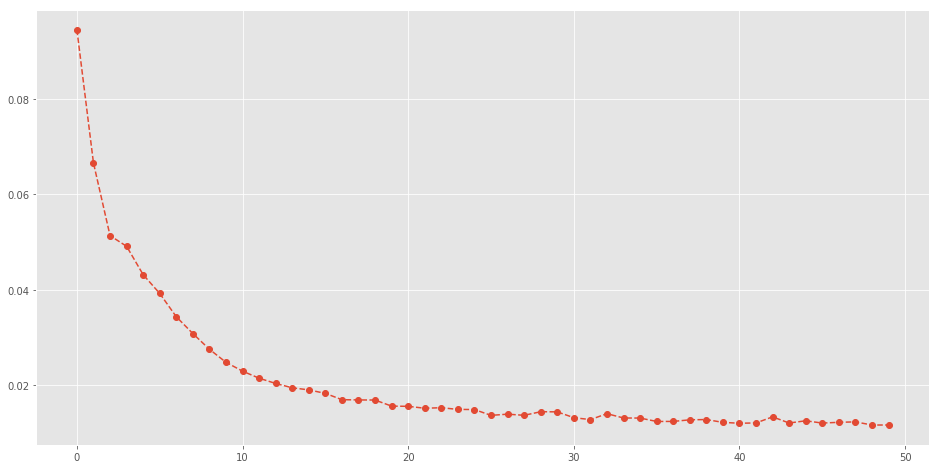

In [92]:
plt.plot(fit_reg.history["val_loss"], "--o")
plt.show()

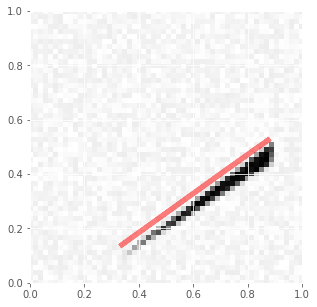

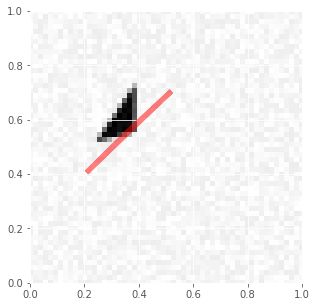

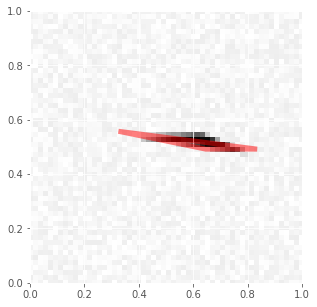

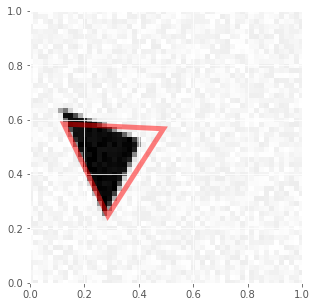

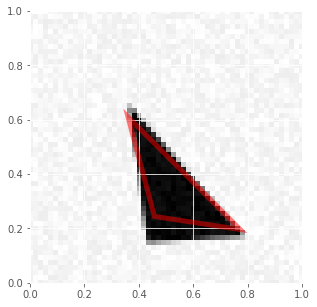

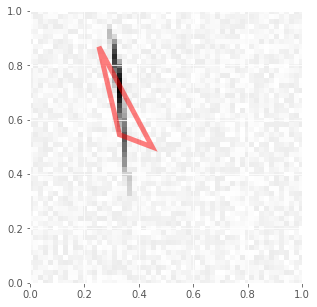

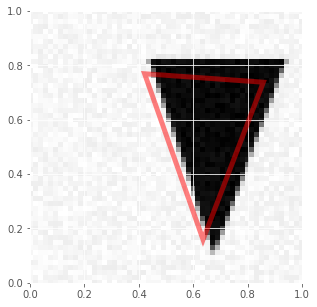

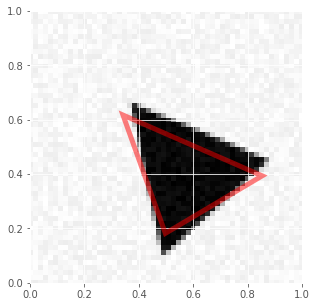

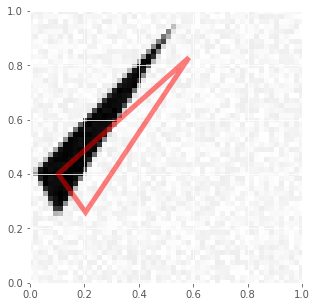

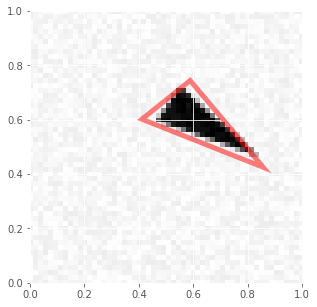

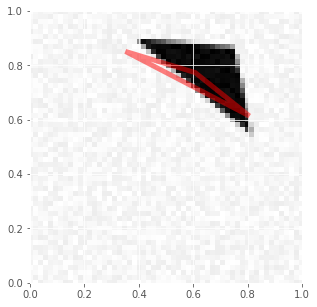

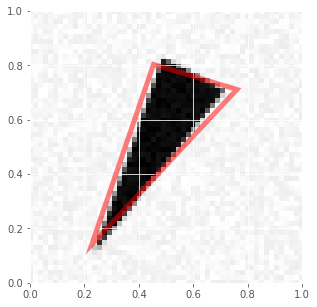

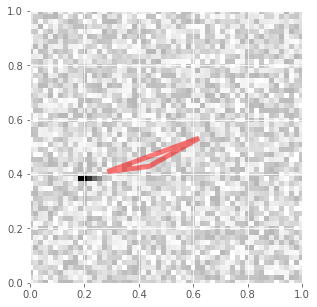

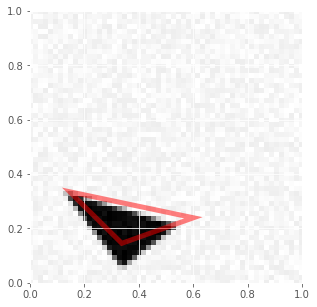

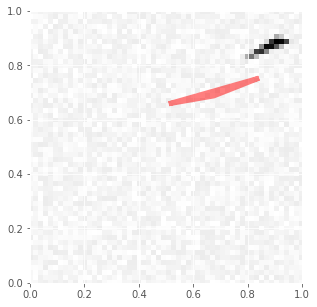

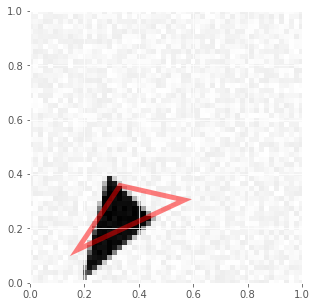

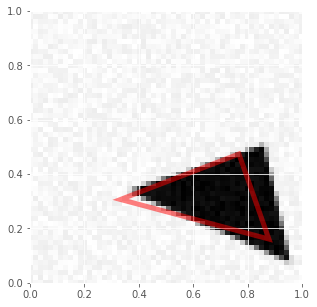

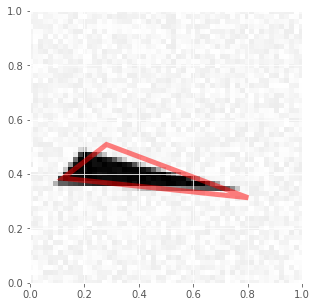

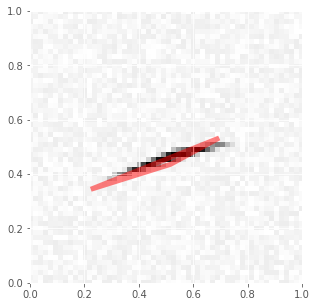

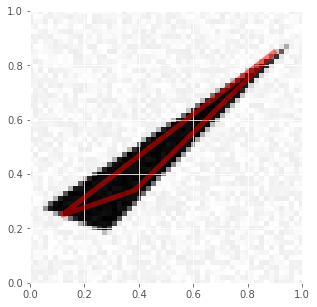

In [93]:
for i in range(20):
    visualize_prediction(X_train[i], model_reg_2_ada.predict(X_train[i].reshape(1, 72, 72, 1)))

We have managed much better precision by having a separate branch of dense layers for each output. The results seem much more interesting now. We can note that it seems to be completely off mostly for really thin triangles and therefore our network might need some fine-tuning on the pooling layers (or even removing the max pool layers).

# 7. Image denoising

In [21]:
np.random.random((2, 2))

array([[0.11655083, 0.44461949],
       [0.84381172, 0.40266793]])

In [7]:
def generate_noise_dataset(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            Y[i] = generate_a_rectangle(0, free_location)
        elif category == 1: 
            Y[i] = generate_a_disk(0, free_location)
        else:
            [Y[i], V] = generate_a_triangle(0, free_location)
    Y = Y.reshape((nb_samples, 72, 72))
    X = (Y + np.random.random(Y.shape) * noise) / (255 + 2 * noise)
    Y /= (255 + 2 * noise)
    return [X, Y]

In [14]:
[X_train, Y_train] = generate_noise_dataset(5300, noise=20, free_location=True)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

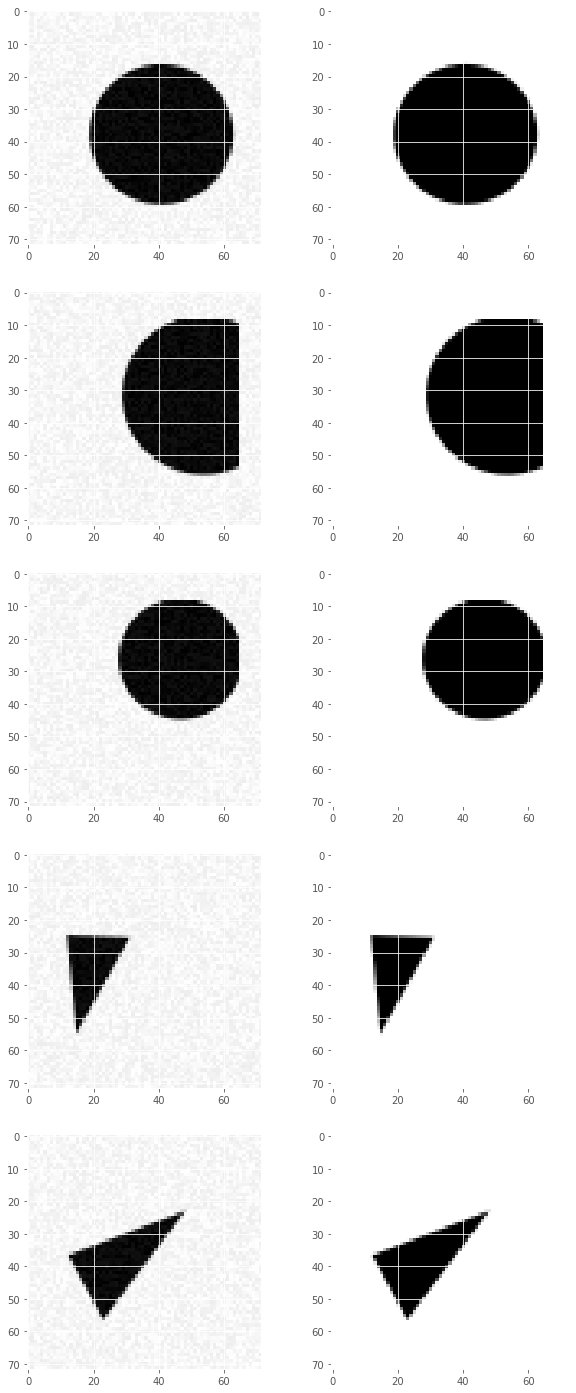

In [15]:
plt.figure(figsize=(10, 25))
for i in range(5):
    plt.subplot(5, 2, 2 * i + 1)
    plt.imshow(X_train[i].reshape(72, 72), cmap=plt.cm.gray)
    plt.subplot(5, 2, 2 * i + 2)
    plt.imshow(Y_train[i].reshape(72, 72), cmap=plt.cm.gray)

In [16]:
import pickle
# pickle.dump((X_train, Y_train), open("train_data_noisy.pkl", 'wb'))
X_train, Y_train = pickle.load(open("train_data_noisy.pkl", "rb"))
[X_test, Y_test] = generate_test_set_regression()  # Has a fixed seed

In [ ]:
input_img = Input(shape=(32, 32, 3))
x = Conv2D(64, (3, 3), padding='same')(input_img)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), padding='same')(encoded)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
decoded = Activation('sigmoid')(x)

In [25]:
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dropout, Dense, BatchNormalization


model_noise = Sequential()
activation = "relu"

model_noise.add(Conv2D(36, (3, 3), padding='same'))
model_noise.add(BatchNormalization())
model_noise.add(Activation('relu'))
model_noise.add(MaxPooling2D((2, 2), strides=(1, 1), padding='same'))

model_noise.add(Conv2D(18, (3, 3), padding='same'))
model_noise.add(BatchNormalization())
model_noise.add(Activation('relu'))
model_noise.add(MaxPooling2D((2, 2), strides=(1, 1), padding='same'))

model_noise.add(Conv2D(36, (3, 3), padding='same'))
model_noise.add(BatchNormalization())
model_noise.add(Activation('relu'))
model_noise.add(MaxPooling2D((2, 2), strides=(1, 1), padding='same'))

model_noise.add(Conv2D(1, (3, 3), padding='same'))

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.98) 
model_noise.compile(loss="mean_squared_error", optimizer=adam)

In [28]:
model_noise.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 72, 72, 36)        360       
_________________________________________________________________
batch_normalization_4 (Batch (None, 72, 72, 36)        144       
_________________________________________________________________
activation_4 (Activation)    (None, 72, 72, 36)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 72, 72, 36)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 18)        5850      
_________________________________________________________________
batch_normalization_5 (Batch (None, 72, 72, 18)        72        
_________________________________________________________________
activation_5 (Activation)    (None, 72, 72, 18)        0         
__________

In [27]:
fit_noise = model_noise.fit(
    X_train.reshape(5300, 72, 72, 1), Y_train.reshape(5300, 72, 72, 1),
    validation_split=300 / 5300,
    batch_size=100, epochs=10
)

Train on 5000 samples, validate on 300 samples
Epoch 1/10
5000/5000 [==============================] - 211s 42ms/step - loss: 0.1563 - val_loss: 0.0212
Epoch 2/10
5000/5000 [==============================] - 189s 38ms/step - loss: 0.0059 - val_loss: 0.0099
Epoch 3/10
5000/5000 [==============================] - 200s 40ms/step - loss: 0.0038 - val_loss: 0.0100
Epoch 4/10
5000/5000 [==============================] - 215s 43ms/step - loss: 0.0027 - val_loss: 0.0101
Epoch 5/10
5000/5000 [==============================] - 190s 38ms/step - loss: 0.0025 - val_loss: 0.0108
Epoch 6/10
5000/5000 [==============================] - 183s 37ms/step - loss: 0.0022 - val_loss: 0.0100
Epoch 7/10
5000/5000 [==============================] - 183s 37ms/step - loss: 0.0019 - val_loss: 0.0105
Epoch 8/10
5000/5000 [==============================] - 184s 37ms/step - loss: 0.0018 - val_loss: 0.0054
Epoch 9/10
5000/5000 [==============================] - 188s 38ms/step - loss: 0.0016 - val_loss: 0.0044
Epoch 10

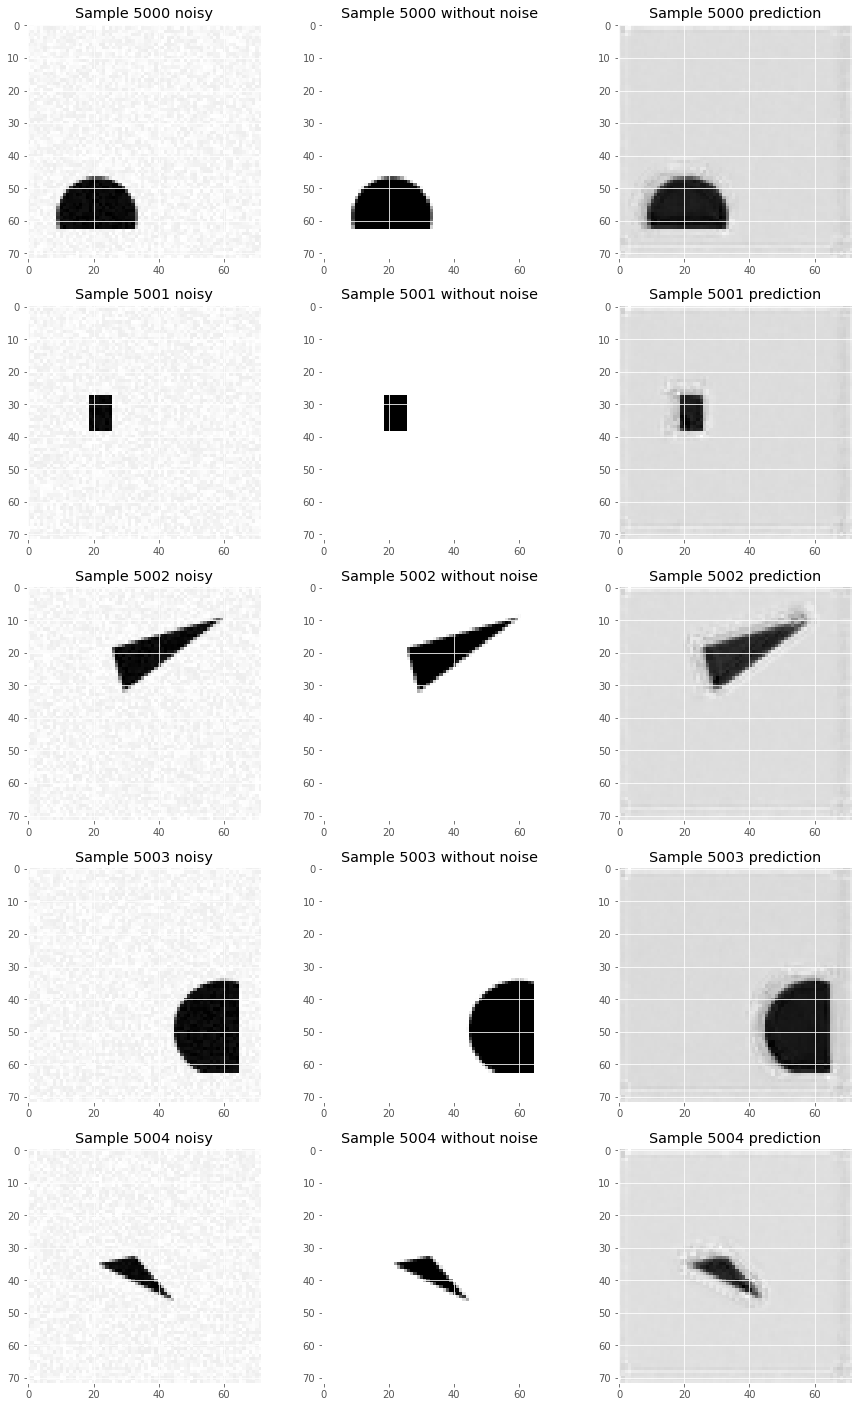

In [33]:
plt.figure(figsize=(15, 25))
for i in range(5):
    plt.subplot(5, 3, 3 * i + 1)
    plt.title(f"Sample {i + 5000} noisy")
    plt.imshow(X_train[i + 5000].reshape(72, 72), cmap=plt.cm.gray)
    plt.subplot(5, 3, 3 * i + 2)
    plt.title(f"Sample {i + 5000} without noise")
    plt.imshow(Y_train[i + 5000].reshape(72, 72), cmap=plt.cm.gray)
    plt.subplot(5, 3, 3 * i + 3)
    plt.title(f"Sample {i + 5000} prediction")
    plt.imshow(model_noise.predict(X_train[i + 5000].reshape(1, 72, 72, 1)).reshape(72, 72), cmap=plt.cm.gray)

Our network seems not bad in terms of performance. However it seems to add a background constant that should explain most of the error. It also seems to overfit a little and could use some regularization.